**Умова:**

Проведіть крос-валідацію для моделі, побудованої на основі датфрейму petrol_consumption з попереднього завдання. Обгрунтуйте обраний метод крос-валідації.

**1. Отримання даних**

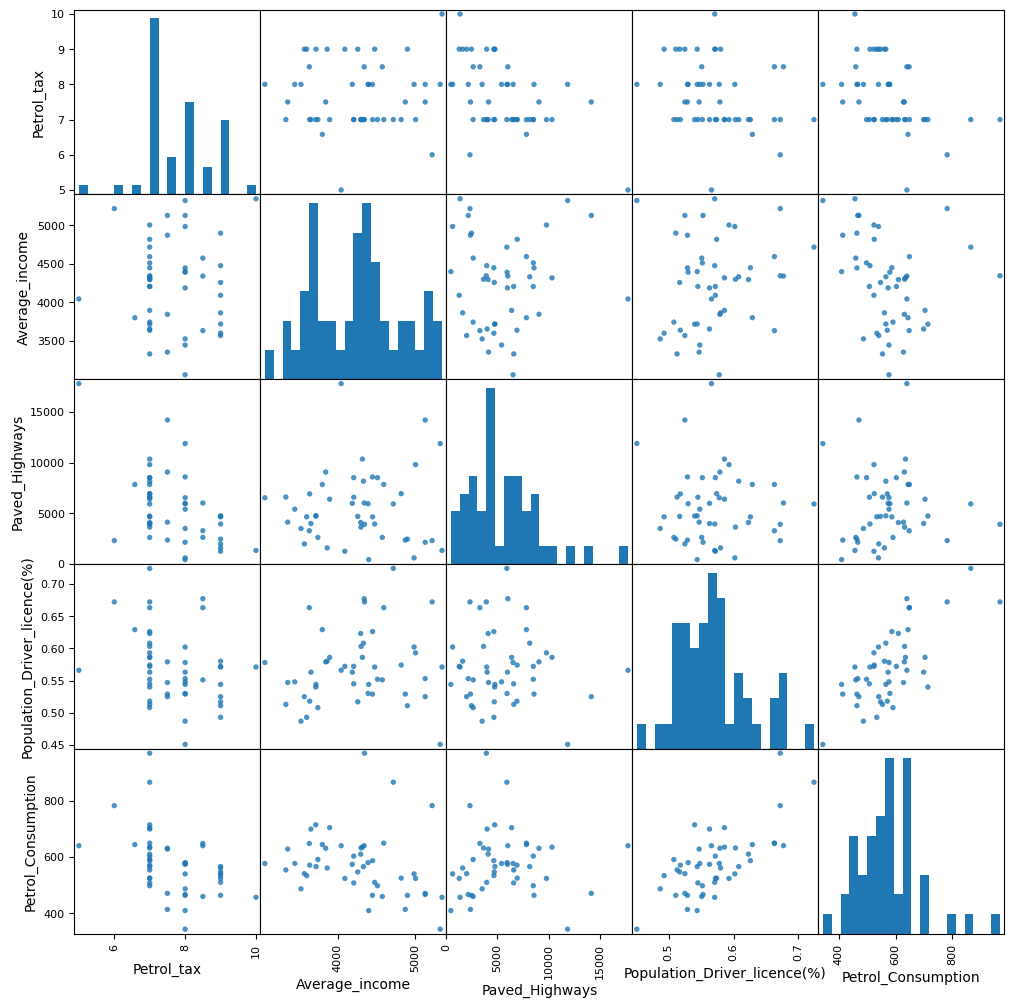

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('petrol_consumption.csv')
grr = pd.plotting.scatter_matrix(df, figsize=(12, 12), hist_kwds={'bins': 20}, s=60, alpha=.8)

**2. Розділення даних на тренуючу та тестову частини**

In [130]:
from sklearn.model_selection import train_test_split

df = df.drop(['Paved_Highways'], axis=1)

predictors = list(df.head(0).iloc[:, :-1])
outcome = 'Petrol_Consumption'

X, y = pd.DataFrame(df[predictors]), pd.DataFrame(df[outcome])
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=38)

**3. Проведемо стагдартизацію даних**

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
standartized_x = scaler.transform(x_train)

**4. Навчання та перевірка моделі**

In [132]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(x_train, y_train)
print('Score: {:.3f}'.format(lr.score(x_test, y_test)))

Score: 0.617


**5. Використаємо метод крос-валідації**

In [133]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=2)
lr_cv = LinearRegression()


test_scores = []

for train_index, test_index in kfold.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr_cv.fit(x_train, y_train)
    test_scores.append(round(lr_cv.score(x_test, y_test), 3))
print('Cross Validation: ', test_scores)

Cross Validation:  [0.681, 0.502]


**Висновок:**

З допомогою крос-валідації не вдалося покращити модель лінійної регресії незадовільної якості. Збільшення розрядності К-кратної валідації тільки погіршує модель, що,  на мою думку, ясно свідчить про недоученість моделі у зв'язку з невеликою кількістю даних. 